In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [27]:
df = pd.read_csv('../data/Wine_dataset.csv', usecols=[0,1,2])

In [28]:
df.head()

,class,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       178 non-null    int64  
 1   Alcohol     178 non-null    float64
 2   Malic acid  178 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


<Axes: xlabel='Alcohol', ylabel='Density'>

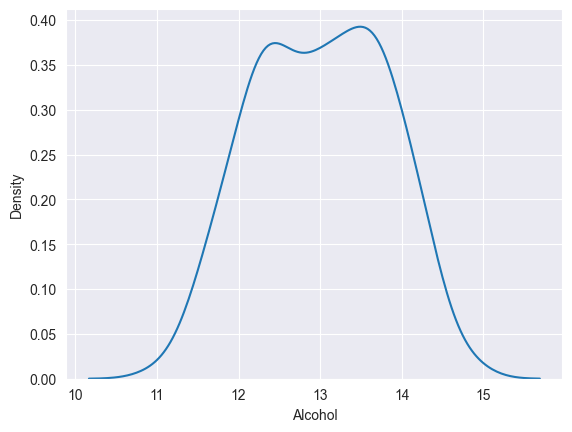

In [30]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

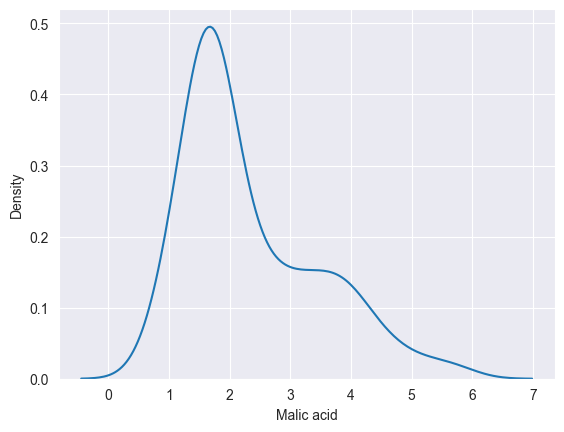

In [31]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

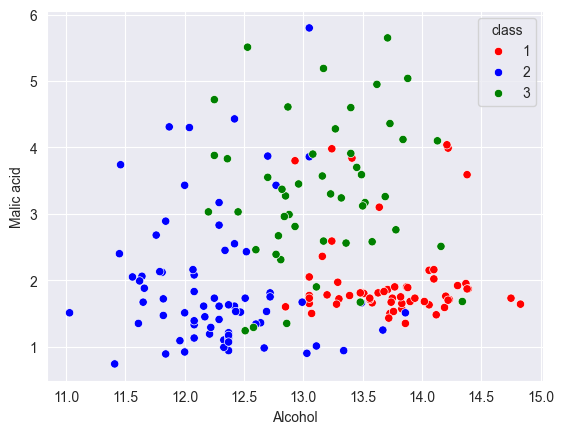

In [32]:
color_dict = {1 : 'red', 2 : 'blue', 3 : 'green'}
sns.scatterplot(x = df['Alcohol'], y = df['Malic acid'], hue=df['class'], palette=color_dict)

In [37]:
from sklearn.model_selection import train_test_split
x = df[['Alcohol', 'Malic acid']]
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((142, 2), (36, 2))

In [38]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

#fit the scalar to the train set, it will learn the parameters
scalar.fit(X_train)

X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [39]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [40]:
np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,142.0,142.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.7
25%,12.3,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [41]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,142.0,142.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


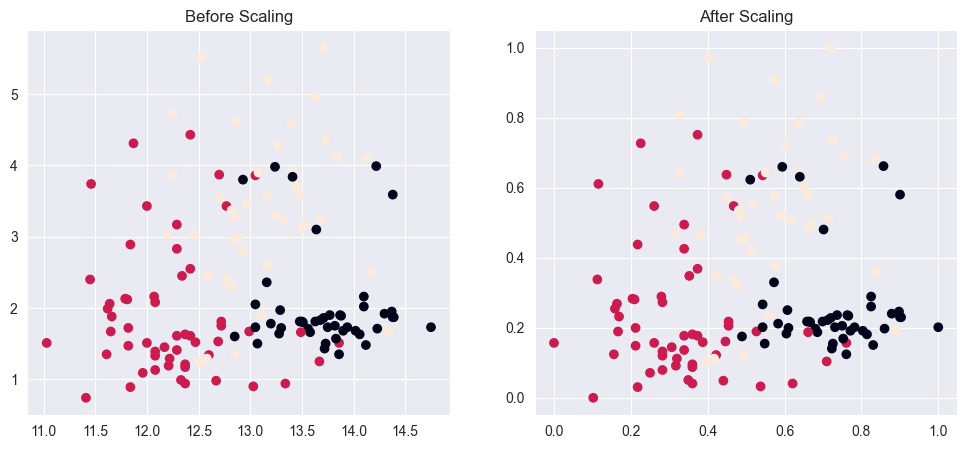

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'], c=y_train)
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'], c=y_train)
ax2.set_title('After Scaling')
plt.show()